In [1]:
!pip install umap-learn hdbscan bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 80.9 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 64.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 29.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.8 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: n

In [3]:
import numpy as np
import pandas as pd
import os
import torch
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN
import matplotlib.pyplot as plt
from bertopic import BERTopic
from bertopic.representation import MaximalMarginalRelevance

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [5]:
embedding_model = SentenceTransformer('thenlper/gte-small', device=device)

modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/583 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/66.7M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [6]:
path = "/kaggle/input/bbc-news-summary/BBC News Summary/News Articles/tech/"
data = []
for file in os.listdir(path):
    with open(os.path.join(path, file), 'r') as f:
        data.append(f.read())
df = pd.DataFrame(data = data, columns=['summary'])

In [7]:
df.head()

,summary
0,Digital UK driven by net and TV\n\nThe UK's ad...
1,Bond game fails to shake or stir\n\nFor gaming...
2,US top of supercomputing charts\n\nThe US has ...
3,Text message record smashed again\n\nUK mobile...
4,US woman sues over ink cartridges\n\nA US woma...


## Converting the text to Embedding

In [8]:
embeddings = embedding_model.encode(df['summary'])
embeddings.shape

Batches:   0%|          | 0/13 [00:00<?, ?it/s]

(401, 384)

## Dimention Reduction

In [9]:
umap_model = UMAP(n_components=7, metric='cosine', min_dist=0, random_state=42)

In [10]:
reduced_embeddings = umap_model.fit_transform(embeddings)
reduced_embeddings.shape

(401, 7)

## Clustering

In [11]:
hdbscan_model = HDBSCAN(min_cluster_size = 50, metric="euclidean", cluster_selection_method="eom").fit(reduced_embeddings)

In [12]:
clusters = hdbscan_model.labels_
len(clusters)

401

### Viewing few documents form first cluster

In [13]:
for index in np.where(clusters==0)[0][:3]:
    print(df.summary.iloc[index][:300] + "...\n ====== \n")

Concerns over Windows ATMs

Cash machine networks could soon be more susceptible to computer viruses, a security firm has warned.

The warning is being issued because many banks are starting to use the Windows operating system in machines. Already there have been four incidents in which Windows viru...

Security warning over 'FBI virus'

The US Federal Bureau of Investigation is warning that a computer virus is being spread via e-mails that purport to be from the FBI.

The e-mails show that they have come from an fbi.gov address and tell recipients that they have accessed illegal websites. The mess...

Seamen sail into biometric future

The luxury cruise liner Crystal Harmony, currently in the Gulf of Mexico, is the unlikely setting for tests of biometric technology.

As holidaymakers enjoy balmy breezes, their ship's crew is testing prototype versions of the world's first internationally issued b...



### Visualizing

In [14]:
v_reduced_embeddings = UMAP(n_components=2, metric='cosine', random_state = 42).fit_transform(embeddings)
v_df = pd.DataFrame(v_reduced_embeddings, columns=['x', 'y'])
v_df['cluster'] = [c for c in clusters]

In [15]:
v_df.head()

,x,y,cluster
0,3.095332,6.407820,2
1,9.420538,5.342958,1
2,5.035756,6.956182,2
3,7.329312,7.500347,2
4,4.624078,5.516585,2


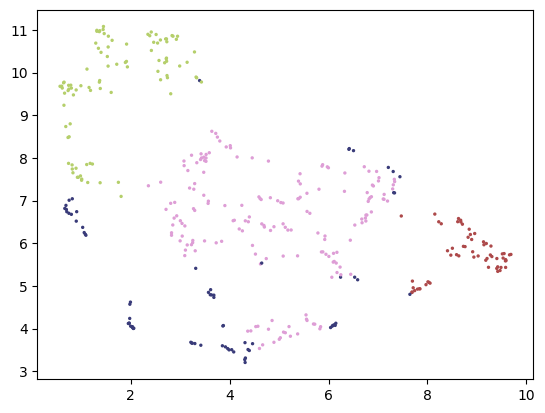

In [16]:
plt.scatter(v_df.x, v_df.y, c=v_df.cluster, s = 2, alpha = 1, cmap='tab20b')

### Topic Modeling

In [17]:
topic_model = BERTopic(
    embedding_model = embedding_model,
    umap_model = umap_model,
    hdbscan_model = hdbscan_model,
    verbose = True
)

topic_model.fit(df.summary, embeddings)

2025-08-12 07:00:52,232 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-08-12 07:00:53,318 - BERTopic - Dimensionality - Completed ✓
2025-08-12 07:00:53,319 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-08-12 07:00:53,333 - BERTopic - Cluster - Completed ✓
2025-08-12 07:00:53,342 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-08-12 07:00:53,521 - BERTopic - Representation - Completed ✓


In [18]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,73,-1_the_to_of_and,"[the, to, of, and, in, it, that, for, is, said]",[What high-definition will do to DVDs\n\nFirst...
1,0,174,0_the_to_of_and,"[the, to, of, and, in, is, that, it, for, be]",[Gadgets galore on show at fair\n\nThe 2005 Co...
2,1,94,1_the_to_of_and,"[the, to, of, and, that, in, is, said, for, it]",[Cyber crime booms in 2004\n\nThe last 12 mont...
3,2,60,2_the_of_to_and,"[the, of, to, and, in, games, game, is, for, it]",[Mobile games come of age\n\nThe BBC News webs...


In [26]:
representation_model = MaximalMarginalRelevance(diversity=.2)
topic_model.update_topics(df.summary, representation_model =representation_model )

In [27]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,73,-1_of_it_for_said,"[of, it, for, said, will, has, software, apple...",[What high-definition will do to DVDs\n\nFirst...
1,0,174,0_of_for_on_will,"[of, for, on, will, have, more, by, mobile, ca...",[Gadgets galore on show at fair\n\nThe 2005 Co...
2,1,94,1_to_of_that_is,"[to, of, that, is, security, users, microsoft,...",[Cyber crime booms in 2004\n\nThe last 12 mont...
3,2,60,2_of_to_games_game,"[of, to, games, game, for, on, with, gaming, h...",[Mobile games come of age\n\nThe BBC News webs...


In [28]:
topic_model.find_topics("OpenAI")

([-1, 0, 1, 2], [0.85328794, 0.85178256, 0.84677, 0.8127955])

In [29]:
topic_model.get_topics(2)

{'Main': {-1: [('of', 0.06169231410955053),
   ('it', 0.040794972919764055),
   ('for', 0.03760809345013233),
   ('said', 0.030931404602577317),
   ('will', 0.021242905342509718),
   ('has', 0.021088380893359748),
   ('software', 0.01825340468554742),
   ('apple', 0.017525458452078455),
   ('dvd', 0.017003783632780628),
   ('mr', 0.016594599836076866)],
  0: [('of', 0.05967011205779688),
   ('for', 0.03278786524175702),
   ('on', 0.029976307329211),
   ('will', 0.026696924123893812),
   ('have', 0.02267721312727457),
   ('more', 0.021123897545671406),
   ('by', 0.01952386571042816),
   ('mobile', 0.018666097096370397),
   ('can', 0.018095290991538428),
   ('digital', 0.016763212691671615)],
  1: [('to', 0.0752986661573602),
   ('of', 0.06576861475691881),
   ('that', 0.05061764440396769),
   ('is', 0.03861276741750675),
   ('security', 0.02440730459680588),
   ('users', 0.021736170985208216),
   ('microsoft', 0.021254129009133284),
   ('virus', 0.021219714522650784),
   ('mail', 0.0202